<h1>Computer lab 5: Monte Carlo methods</h1>
<h2>Part 3: Brownian motion</h2>

<i>Brownian motion or random walk is the name of a type of random motion. Brownian motion is a stochastic process that appear in many different applications. It can be used in Monte Carlo simulations of a diverse set of phenomena, including particle (i.e. molecule) simulations and simulations of the financial market.</i>

<h3>Import Python libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<h4>Brownian motion and Monte Carlo</h4>
<p>
In the dice simulation in this lab (part 1), you worked with a simple Monte Carlo simulation. The ‘process’ in that case was not very complicated, but you can use the same principles to simulate more complex stochastic processes arising in other problem settings. Here, we will use a stochastic model to simulate how a large particle moves in an
environment of small molecules. The stochastic process here is the so called Brownian motion.</p>

<p>
    In the cell below you will find the function <code>brown</code>, that simulates Brownian motion when you call it. First run the cell to define the function (you will get no output).
</p>

In [ ]:
def brown(end_time, x0, dt):
    """n-dimensional brownian motion (also called Wiener process).

    Input:  end_time - the final time in seconds
            x0       - starting point. For example, x0 = numpy.array([[0,0]]) gives a 2D-trajectory
                       starting at point (0,0). Note that x0 must be a 2D-array if a 2D-problem
            dt       - time step
    Output: X        - the trajectory. The first column, X[1,:], corresponds to coordinates in the
                       x1-dimension, 2nd column, X[2, :] to the x2-dimension and so forth.

    To plot the trajectory in 2D, you can use:
    plt.plot(X[:,0], X[:,1])

    To plot the trajectory in 3D, you can use:
    ax = plt.axes(projection='3d')
    ax.plot3D(X[:,0], X[:,1], X[:,2])
    """

    if dt >= end_time:
        print("The time step dt cannot be larger than end_time")
        print("Interrupted")
        return

    dim = np.shape(x0)[1]  # dimension of the trajectory
    N = int(np.floor(end_time / dt))  # number of simulation steps

    # take N simulation steps with normal distributed noise
    noise = np.random.randn(N, dim)
    X = np.tile(x0, (N, 1))
    X = X + np.sqrt(dt) * np.cumsum(noise, axis=0)

    # add initial condition to the output trajectory
    X = np.concatenate((x0, X), axis=0)

    return X

<p>
To get a feeling for the Brownian motion process, call the function a few times with starting point $(0, 0)$ and end time 1 second. Vary the time step <code>dt</code> (try for example 0.1, 0.01 and 0.001). Plot the trajectory in 2D. Run multiple different simulations with the same parameters and observe the variation in the generated trajectory. Read the comments in the function to understand how it is used, and how to plot the trajectories in 2D.
</p>

In [ ]:
# Add your code here
x0 = np.array([[0, 0]])
X = brown(1, x0, 0.1)

Run the simulation in 3D and plot the resulting 3D-trajectory. Run multiple different simulations and observe the variations in the generated trajectory. Hint: Sometimes the default viewing angle is not optimal. In this case, we can use the **view_init** method to rotate the 3D-plot. For example, you can use the command **ax.view_init(35, 35)** to set an elevation of 35 degrees and an azimuth of 35 degrees.

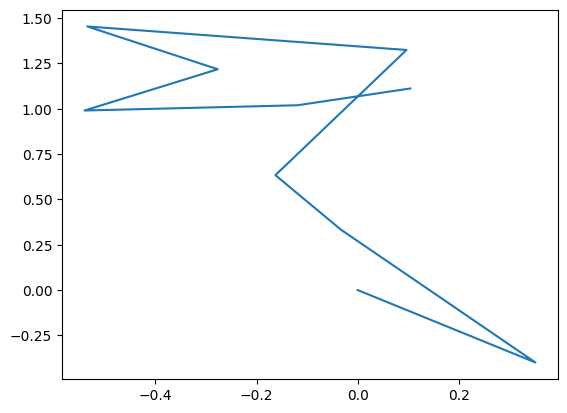

In [9]:
# Add your code here
plt.plot(X[:, 0], X[:, 1])

<p>As you can see, each new call to brown generates a different trajectory. </p>

<h4>A Monte Carlo simulation with Brownian motion</h4>
<p>Brownian motion in itself is <b>not</b> a Monte Carlo method, it is a stochastic process. But it can be used in Monte Carlo methods, for example to study the behavior of particles. One question that answered with a Monte Carlo method is for example: <i>On average, how far from the origin will a particle be located after $t = 1s$?</i><br>
We can try to find this out by generating many trajectories and calculating the mean distance. That simulation will be a Monte Carlo simulation.<br>
Remember that a general algorithm for a Monte Carlo simulation is:</p>

    for i = 1,2,3,...,N:
       Simulate one stochastic process. Store in vector.
    end
    Compute the mean of the vector.

<p>In this particular case, the stochastic process is Brownian motion and to calculate the distance between the starting point and the end point of the particle trajectory. To compute this distance, we use the command <code>numpy.linalg.norm(X[-1,:] - X[0,:])</code>, where <code>X[-1,:]</code> is the end point and <code>X[0,:]</code> is the starting point of the trajectory.
    </p>
    <p>Run the code a few times. Do you get exacty the same answer? Try to understand the code.</p>

In [ ]:
# Monte Carlo simulation of particle distance
N = 1000
dt = 0.01
x0 = np.array([[0, 0, 0]])
dist = np.zeros(N)
for i in range(0, N):
    X = brown(1, x0, dt)
    dist[i] = np.linalg.norm(X[-1, :] - X[0, :])

mean_dist = np.mean(dist)
print(mean_dist)

1.599793935130803


<p>As you could see, the exact distance changes slightly every time you run the simulation. In what way do the result differ? In the same way as with the dice-simulation we can investigate the distribution of the results, i.e the mean.<br>
If we run many Monte Carlo simulations, i.e. run the algorithm above many times, and save all mean-values in a vector, and then plot all mean-values in a histogram, we should be able to see the distribution.<br>
Run the program below to generate the distribution. Note, it will take some time to run the code here (so don't use too big <code>N</code><br>
Begin e.g. with <code>N=100</code>. What distribution do we approach? If you increase to <code>N</code> to 200, how does the standard deviation change?
    </p>

Standard deviation =  0.0482


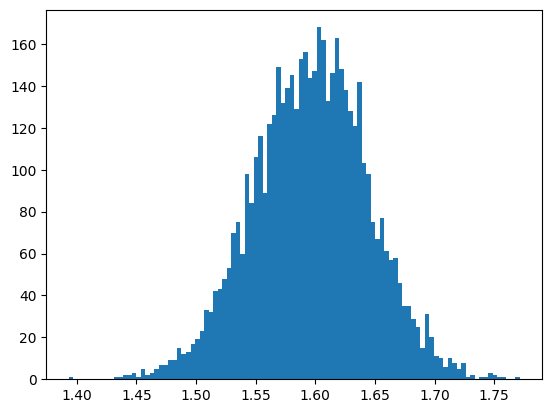

In [ ]:
N = 200  # The number of trials in one MC-simulation, change this

M = 5000  # The number of Monte Carlo-simulations
dt = 0.01
x0 = np.array([[0, 0, 0]])
dist = np.zeros(N)
mean_distance = np.zeros(M)
# The inner loop is one MC-simulation
for k in range(0, M):
    for i in range(0, N):
        X = brown(1, x0, dt)
        dist[i] = np.linalg.norm(X[-1, :] - X[0, :])

    mean_distance[k] = np.mean(dist)

print("Standard deviation = ", str(np.around(np.std(mean_distance), 4)))
plt.hist(mean_distance, bins=100)
plt.show()


<p>What you see here was <b>the central limit theorem</b> again.</p>